In [12]:
import random

In [13]:
solvers = ['Solver A', 'Solver B', 'Solver C', 'Solver D']

In [14]:
results = dict()
for i in range(len(solvers)):
    alpha = (1+i) * 2
    beta = 0.4
    results[solvers[i]] = dict()
    for j in range(1000):
        results[solvers[i]][str(j)] = random.betavariate(alpha, beta)

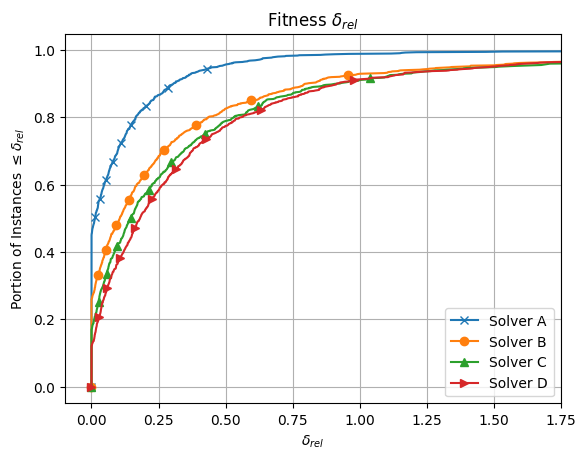

In [15]:
import util.visualization as vis
vis.visualize_gaps(results, n_instances=1000)

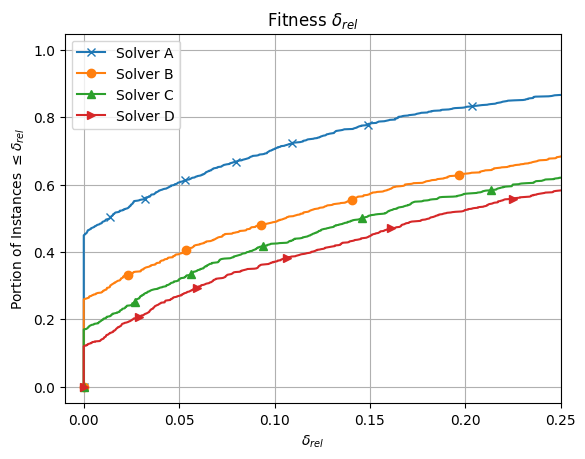

In [16]:
vis.visualize_gaps(results, x_lim_lb=-0.01, x_lim_ub=0.25)

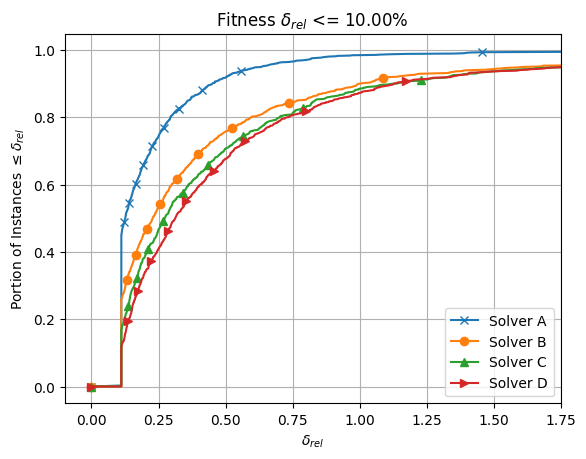

In [17]:
vis.visualize_gaps(results, delta_scope=0.9)

In [18]:
# generating random example timeline data
#p + ((generations_since_last_improvement * (1 / max_waiting_before_restart)) ** 4) * max_p
data = dict()
max_time = 1000
max_fitness = 10000
min_fitness = 100
for solver in solvers:
    time = max_time
    fitness = max_fitness
    entries = []
    i = 0
    j = 1/max_time
    while time > 0 and fitness > min_fitness:
        time *= 1.0-j - 0.1* random.random()
        fitness *= 1.0-j - 0.2* random.random()
        j+= ((i * (1 / max_time)) ** 4)
        i+=1
        entries.append((max_time-time, fitness))
    data[solver] = entries


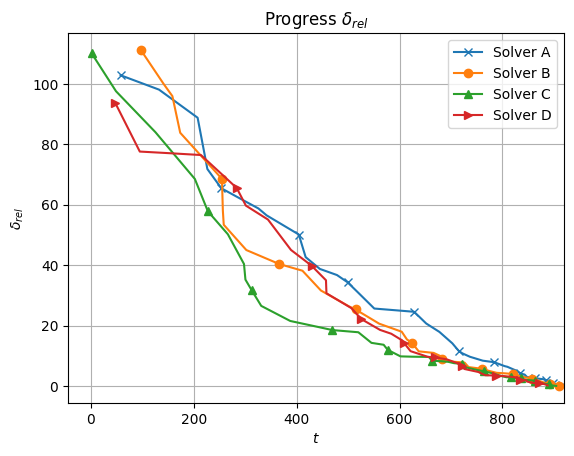

In [19]:
vis.visualize_timeline(data)

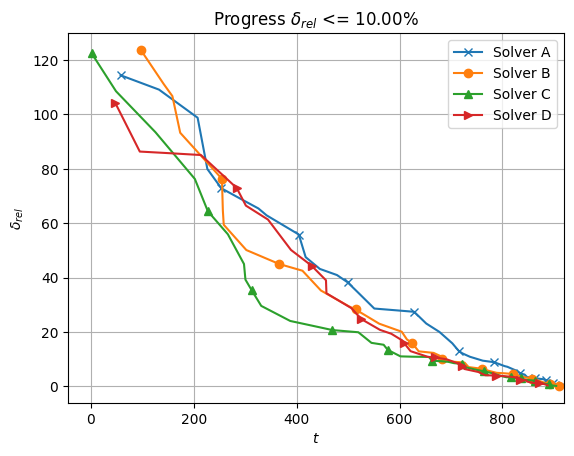

In [20]:
vis.visualize_timeline(data, delta_scope=0.9)